# Get The Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-03-01 17:11:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2025-03-01 17:11:07 (6.48 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



# Import Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    "/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates = ["Date"],
    index_col=["Date"]
    )

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


# Visualized Data

In [ ]:
import matplotlib.pyplot as plt

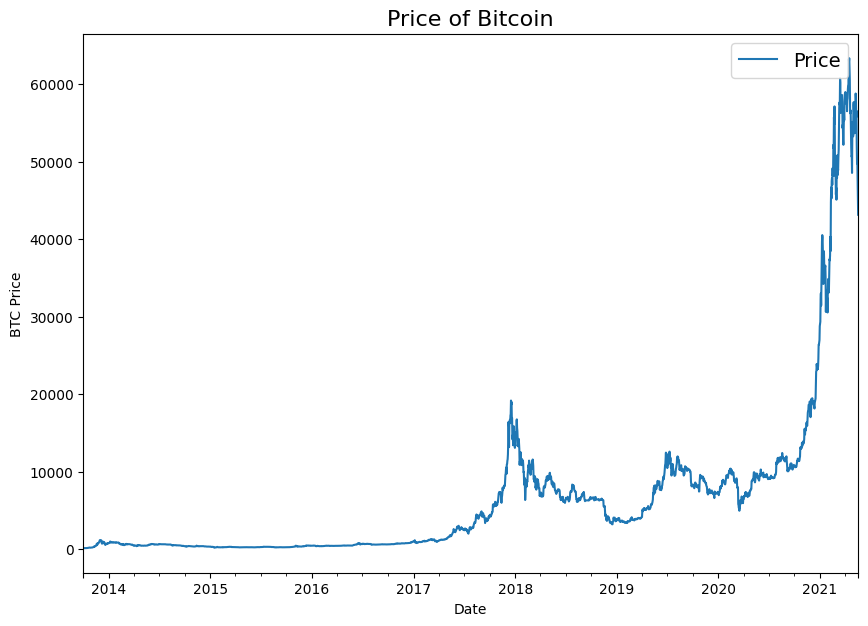

In [ ]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin", fontsize =16)
plt.legend(fontsize =14);

# Import Data In Python CSV Module

In [ ]:
import csv
from datetime import datetime

In [ ]:
timestamps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)

  for line in csv_reader:
    timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [ ]:
timestamps[:10]

[datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 10, 2, 0, 0),
 datetime.datetime(2013, 10, 3, 0, 0),
 datetime.datetime(2013, 10, 4, 0, 0),
 datetime.datetime(2013, 10, 5, 0, 0),
 datetime.datetime(2013, 10, 6, 0, 0),
 datetime.datetime(2013, 10, 7, 0, 0),
 datetime.datetime(2013, 10, 8, 0, 0),
 datetime.datetime(2013, 10, 9, 0, 0),
 datetime.datetime(2013, 10, 10, 0, 0)]

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

<ipython-input-14-b8d8a0d572e1>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize =14);


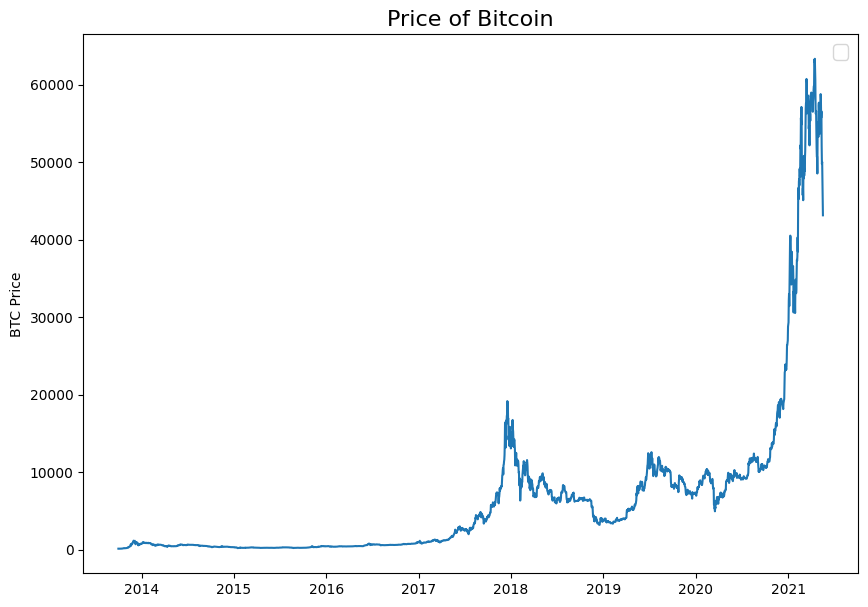

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(timestamps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin", fontsize =16)
plt.legend(fontsize =14);

# Create Train And Test Sets : 01

In [ ]:
from sklearn.model_selection import train_test_split

## Wrong Way

In [ ]:
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
timestamps[:5]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    timestamps,
    prices,
    test_size=0.2,
    random_state=42
    )

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

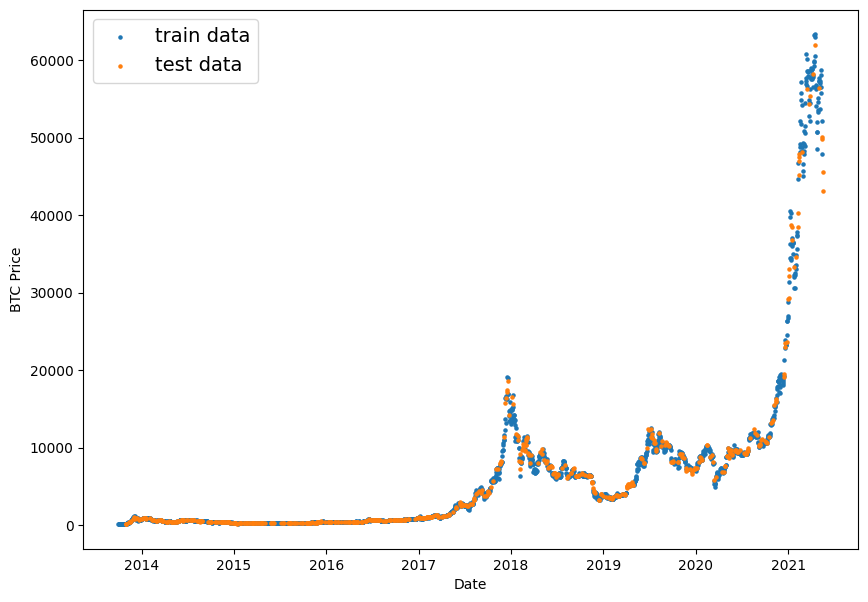

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s = 5, label="train data")
plt.scatter(X_test, y_test, s = 5, label= "test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

## Right Way

In [ ]:
split_size = int(0.8 * len(prices))

In [ ]:
X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

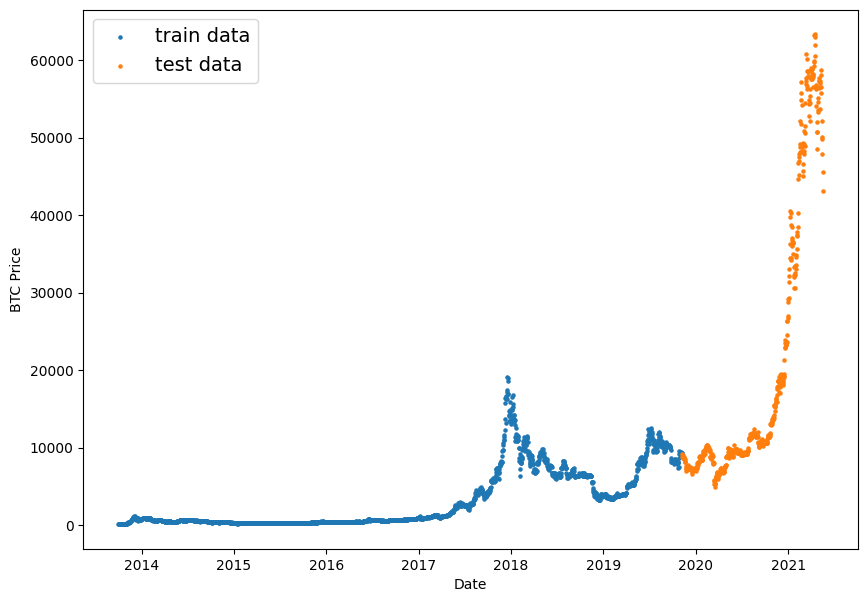

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s = 5, label="train data")
plt.scatter(X_test, y_test, s = 5, label= "test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

# Create Ploting Function

In [ ]:
def plot_time_series(timestamps, values, format=".", start = 0, end = None, label = None):
  plt.plot(timestamps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize = 14)

  plt.grid(True)

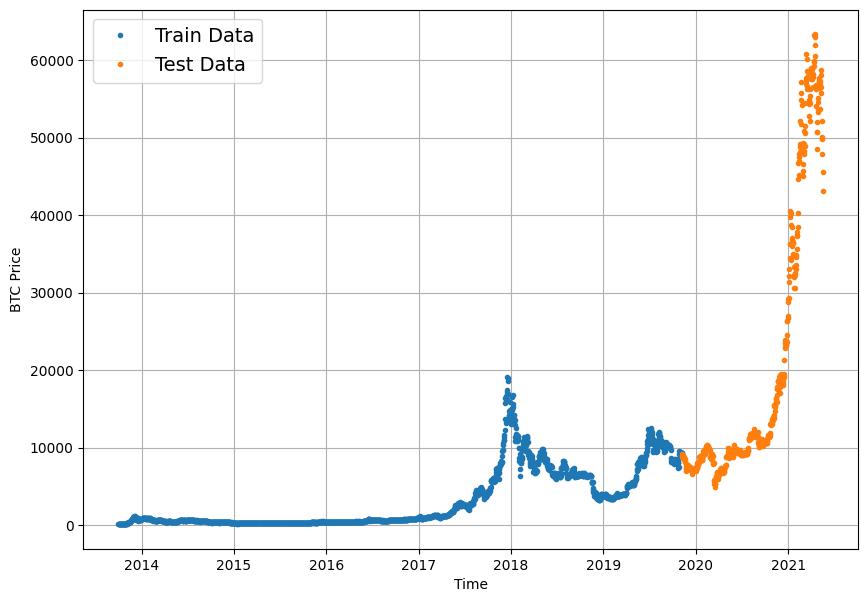

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timestamps=X_train, values=y_train, label = "Train Data")
plot_time_series(timestamps=X_test, values=y_test, label = "Test Data")

# Model 0: Naive Forecast ( Baseline )

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

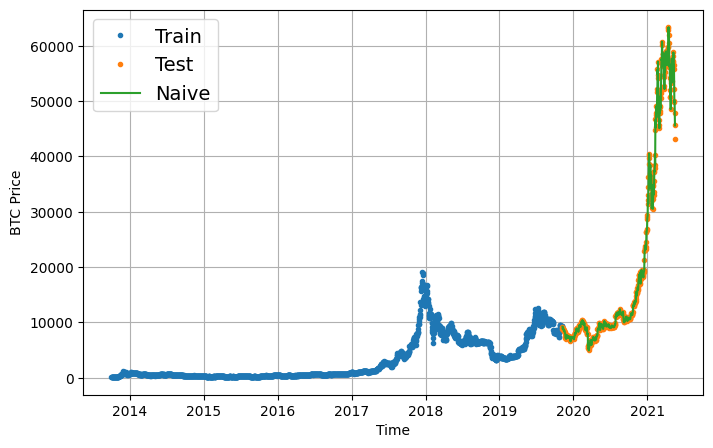

In [ ]:
plt.figure(figsize = (8, 5))
plot_time_series(timestamps=X_train, values=y_train, label ="Train")
plot_time_series(timestamps=X_test, values = y_test, label = "Test")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, format = "-", label = "Naive")

In [ ]:
import tensorflow as tf

# Evaluation Function Implementation

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.MeanAbsoluteError()
    mse = tf.keras.metrics.MeanSquaredError()
    mape = tf.keras.metrics.MeanAbsolutePercentageError()

    mae.update_state(y_true, y_pred)
    mse.update_state(y_true, y_pred)
    mape.update_state(y_true, y_pred)

    rmse = tf.sqrt(mse.result())
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.result().numpy(),
        "mse": mse.result().numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.result().numpy(),
        "mase": mase.numpy()
    }

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Format Data Part 2

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_window(x, horizon = 1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))

test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
import numpy as np

In [ ]:
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).transpose()

  windowed_array = x[window_indexes]

  windows, label = get_labelled_window(windowed_array, horizon=horizon)

  return windows, label

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


In [ ]:
def make_train_test_split(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1 - test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

# Make Modellng Checkpoint Callback

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(
    filepath = os.path.join(save_path, model_name + ".keras"),
    verbose = 0,
    save_best_only = True
  )

# Model 1: Dense ( window  = 7, horizon = 1)

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_1_dense")

In [ ]:
model_1.compile(
    loss = "mae",
    optimizer = "Adam",
    metrics = ["mae", "mse"]
)

In [ ]:
history_model_1 = model_1.fit(
  x=train_windows,
  y=train_labels,
  epochs = 100,
  verbose = 1,
  batch_size = 128,
  validation_data = (test_windows, test_labels),
  callbacks = [create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 2471.2603 - mae: 2471.2603 - mse: 16387795.0000 - val_loss: 1728.7559 - val_mae: 1728.7559 - val_mse: 8629322.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 415.8972 - mae: 415.8972 - mse: 611256.8750 - val_loss: 2169.3623 - val_mae: 2169.3623 - val_mse: 10976387.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 274.8180 - mae: 274.8180 - mse: 329929.4062 - val_loss: 1296.9187 - val_mae: 1296.9187 - val_mse: 4860130.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 208.5684 - mae: 208.5684 - mse: 222261.2812 - val_loss: 1198.4878 - val_mae: 1198.4878 - val_mse: 4427622.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 197.5979 - mae: 197.5979 - mse: 202074.8125 - val_loss: 1154.1637 - val_mae: 1154.1637 - val_mse: 4191651.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 192.7107 - mae: 192.7107 - mse: 191766.0938 - val_loss: 1108.1440 - val_mae: 1108.144

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 283.1053 - mae: 283.1053 - mse: 344228.6875


[564.806640625, 564.806640625, 1155125.125]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)

  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.587, 8777.676, 9025.286, 8766.83 , 8740.391, 8719.442,
       8686.614, 8509.436, 8452.996, 8524.075], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 564.8067,
 'mse': 1155125.2,
 'rmse': 1074.7676,
 'mape': 2.5475936,
 'mase': 0.99220896}

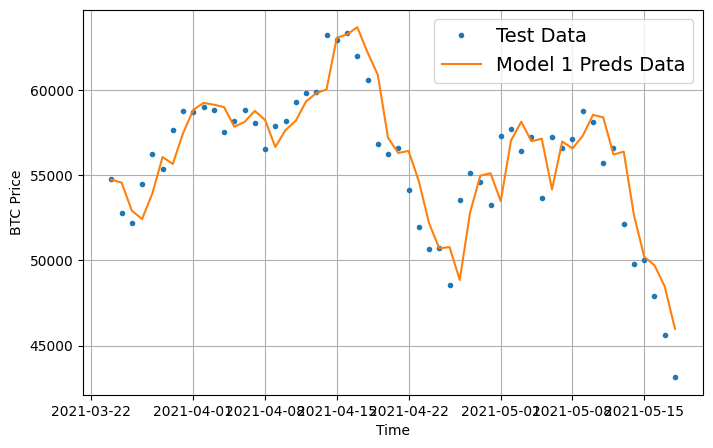

In [ ]:
offset = 500
plt.figure(figsize=(8, 5))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
    )
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values = model_1_preds,
    start=offset,
    label="Model 1 Preds Data",
    format= "-"
)

# Model 2: Dense ( window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(
    windows=full_windows,
    labels = full_labels,
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [ ]:
train_labels[:3]

array([[196.02499],
       [198.04883],
       [198.93233]])

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_2_dense")

In [ ]:
model_2.compile(
    loss = 'mae',
    optimizer = "Adam",
    metrics = ["mae", "mse"]
)

In [ ]:
model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    batch_size = 128,
    verbose = 0,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_2.name)]
)

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 421.9856 - mae: 421.9856 - mse: 531474.1875


[775.1046752929688, 775.1046752929688, 1812823.875]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9125.17  , 9138.49  , 8950.138 , 8794.9795, 8522.647 ],
      dtype=float32)>

In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 775.1046,
 'mse': 1812823.6,
 'rmse': 1346.4114,
 'mape': 3.7242029,
 'mase': 1.3548905}

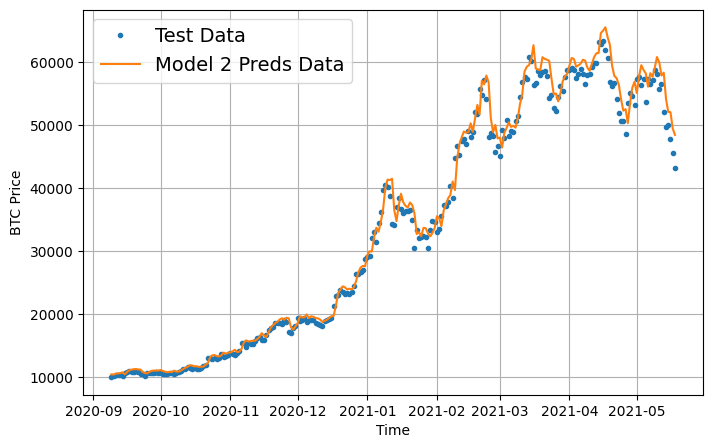

In [ ]:
offset = 300
plt.figure(figsize=(8, 5))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
    )
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values = model_2_preds,
    start=offset,
    label="Model 2 Preds Data",
    format= "-"
)

# Model 3: Dense ( window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(
    windows=full_windows,
    labels = full_labels,
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_windows[:2]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]])

In [ ]:
train_labels[:2]

array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333],
       [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
        262.32666]])

In [ ]:
tf.random.set_seed(32)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_3_dense")

In [ ]:
model_3.compile(
    loss = "mae",
    optimizer = "Adam"
)

In [ ]:
model_3.fit(
    train_windows,
    train_labels,
    epochs = 100,
    batch_size = 128,
    verbose = 0,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_3.name)]
)

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 668.6128


1342.630859375

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8974.005 , 8959.861 , 9230.905 , 9356.438 , 8921.3545, 9108.848 ,
        9344.084 ],
       [8620.338 , 8629.963 , 8868.351 , 9204.267 , 8723.368 , 8702.936 ,
        9099.952 ],
       [8593.187 , 8505.378 , 8957.869 , 8958.251 , 8799.121 , 8782.361 ,
        8990.651 ],
       [8779.177 , 8670.646 , 9227.155 , 9182.101 , 8917.284 , 9043.492 ,
        9277.54  ],
       [8462.356 , 8558.078 , 8875.142 , 9133.329 , 8671.94  , 8787.129 ,
        8913.228 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1342.6306,
 'mse': 5704461.5,
 'rmse': 2388.4014,
 'mape': 6.0176497,
 'mase': 2.3891366}

## Refined Evaluation Functiom

In [ ]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.MeanAbsoluteError()
    mse = tf.keras.metrics.MeanSquaredError()
    mape = tf.keras.metrics.MeanAbsolutePercentageError()

    mae.update_state(y_true, y_pred)
    mse.update_state(y_true, y_pred)
    mape.update_state(y_true, y_pred)

    rmse = tf.sqrt(mse.result())
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.result().numpy(),
        "mse": mse.result().numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.result().numpy(),
        "mase": mase.numpy()
    }

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1342.6306,
 'mse': 5704461.5,
 'rmse': 2388.4014,
 'mape': 6.0176497,
 'mase': 2.3891366}

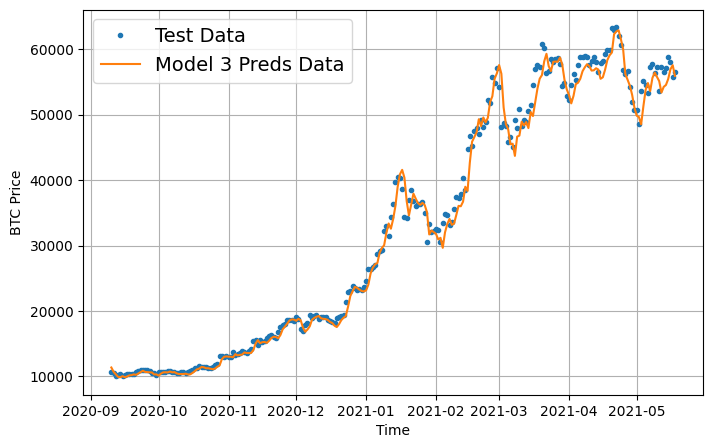

In [ ]:
offset = 300
plt.figure(figsize=(8, 5))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
    )
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values = tf.reduce_mean(model_3_preds, axis = 1),
    start=offset,
    label="Model 3 Preds Data",
    format= "-"
)

<Axes: >

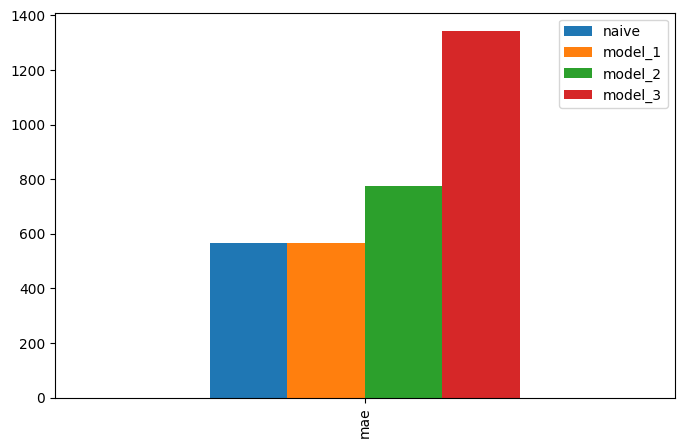

In [ ]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "model_1": model_1_results["mae"],
    "model_2": model_2_results["mae"],
    "model_3": model_3_results["mae"]
}, index=["mae"]).plot(figsize = (8, 5), kind = "bar")

# Model 4: Convolutional Neural Network 1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

## Reshape the dataset

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))
expand_dims_layer

<Lambda name=lambda, built=False>

In [ ]:
print(x.shape)
print(expand_dims_layer(x).shape)
print(expand_dims_layer(x))

(7,)
(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [ ]:
tf.random.set_seed(42)

In [ ]:
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x, axis =1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation="relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_3_conv1d")

In [ ]:
model_4.compile(
  loss = "mae",
  optimizer = "Adam",
)

In [ ]:
model_4.fit(
    train_windows,
    train_labels,
    batch_size = 128,
    epochs = 100,
    verbose = 0,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_4.name)]
)

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 283.7908


567.8595581054688

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8863.752, 8781.987, 9037.848, 8795.317, 8727.441, 8742.147,
       8682.068, 8525.67 , 8460.865, 8528.788], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 567.85956,
 'mse': 1172325.1,
 'rmse': 1082.7396,
 'mape': 2.5403962,
 'mase': 0.99757195}

# Model 5: Recurrent Neural Network ( LSTM )

In [ ]:
tf.random.set_seed(42)

In [ ]:
inputs = layers.Input(shape = (WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation = "relu")(x)
outputs = layers.Dense(HORIZON, activation="linear")(x)

model_5 = tf.keras.Model(
    inputs,
    outputs,
    name = "model_5_lstm"
)

In [ ]:
model_5.compile(
    loss = "mae",
    optimizer = "Adam"
)

In [ ]:
model_5.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_5.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 2502.2546 - val_loss: 9637.5547
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1197.7400 - val_loss: 1063.1161
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 239.8654 - val_loss: 970.1831
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 164.4020 - val_loss: 964.9718
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 168.4195 - val_loss: 948.4358
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 160.3624 - val_loss: 979.2401
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 158.3538 - val_loss: 1006.0845
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 159.6235 - val_loss: 1052.8068
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 174.3197 - val_loss: 1273.2482
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 193.5106 - val_loss: 1208.9327
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 180.3897 - val_loss: 1090.512

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 297.5190


597.1405029296875

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8890.123 , 8754.536 , 8926.967 , 8758.521 , 8686.2   , 8682.472 ,
       8660.657 , 8494.264 , 8421.4375, 8469.664 ], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 597.14044,
 'mse': 1248211.6,
 'rmse': 1117.2339,
 'mape': 2.6744735,
 'mase': 1.0490104}

# Make Multivariate Time Series Dataset

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-06-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2452)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
from sklearn.preprocessing import minmax_scale

<Axes: xlabel='Date'>

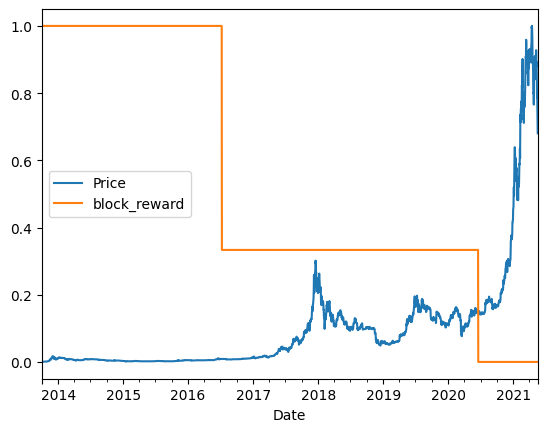

In [ ]:
scaled_price_block_df = pd.DataFrame(minmax_scale(
    bitcoin_prices_block[["Price", "block_reward"]]),
    columns = bitcoin_prices_block.columns,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot()

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i +1)

In [ ]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


## Create X And Y Features

In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [ ]:
split_size = int(len(X) * 0.8)

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Dense ( Multivariate Time Series )

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear"),
], name = "model_6_multivariate")

In [ ]:
model_6.compile(
    loss = "mae",
    optimizer = "Adam"
)

In [ ]:
model_6.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 128,
    verbose = 1,
    validation_data = (X_test, y_test),
    callbacks = [create_model_checkpoint(model_6.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 2070.7771 - val_loss: 2310.2278
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 406.7233 - val_loss: 1830.0896
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 234.1144 - val_loss: 1241.2949
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 193.5931 - val_loss: 1133.2335
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 184.7123 - val_loss: 1052.5807
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 177.9939 - val_loss: 1017.4254
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 173.2589 - val_loss: 1013.0771
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 169.6810 - val_loss: 982.6443
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165.0936 - val_loss: 950.0286
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 160.5724 - val_loss: 914.4229
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 156.0956 - val_loss: 878.5800
Epoch 

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 288.9589


577.2012939453125

In [ ]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8896.844, 8812.578, 9066.964, 8842.101, 8747.725, 8743.265,
       8732.87 , 8535.25 , 8490.186, 8553.715], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(tf.squeeze(y_test), model_6_preds)
model_6_results

{'mae': 577.20135,
 'mse': 1197822.4,
 'rmse': 1094.4507,
 'mape': 2.5826397,
 'mase': 1.0139829}

# Model 7: N-BEATS algoridhm

## Building And Testing N_BEATS BLOCK LAYER

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(
      self,
      input_size: int,
      theta_size: int,
      horizon: int,
      n_neurons: int,
      n_layers: int,
      **kwargs
      ):
    super().__init__(**kwargs)

    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]

    self.theta_layer = layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs):
    x = inputs

    for layer in self.hidden:
      x = layer(x)

    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:,  -self.horizon:]

    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE,
    theta_size = WINDOW_SIZE + HORIZON,
    horizon = HORIZON,
    n_neurons = 128,
    n_layers = 4
)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(tf.squeeze(backcast.numpy()))
print(tf.squeeze(forecast.numpy()))

tf.Tensor(
[-0.42359236  0.00485489  0.21755035 -0.06605431 -0.94930506 -0.24663123
 -0.37610075], shape=(7,), dtype=float32)
tf.Tensor(-0.44830298, shape=(), dtype=float32)


## Preparing Data For N-Beats

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_n_beats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_n_beats[f"Price+{i+ 1}"] = bitcoin_prices_n_beats["Price"].shift(periods = i + 1)

In [ ]:
bitcoin_prices_n_beats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_n_beats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_n_beats.dropna()["Price"]

In [ ]:
split_size = int(len(X) * 0.8)

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Make Dataset Using TF DATA API

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [ ]:
BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting Up Hyperparameters

In [ ]:
N_EPOCHS = 1000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

## Residual Connection

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

In [ ]:
nbeats_block_layer = NBeatsBlock(
  input_size = INPUT_SIZE,
  theta_size = THETA_SIZE,
  horizon= HORIZON,
  n_neurons = N_NEURONS,
  n_layers = N_LAYERS,
  name = "initial_block"
)

In [ ]:
stack_input = layers.Input(shape = (INPUT_SIZE, ), name = 'stack_input')

In [ ]:
residuals, forecast = nbeats_block_layer(stack_input)

In [ ]:
for  i, _ in enumerate(range(N_STACKS - 1)):
  backcast, block_forecast = NBeatsBlock(
    input_size = INPUT_SIZE,
    theta_size = THETA_SIZE,
    horizon= HORIZON,
    n_neurons = N_NEURONS,
    n_layers = N_LAYERS,
    name = f"n_beats_block_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}")

In [ ]:
model_7 = tf.keras.Model(
    inputs = stack_input,
    outputs = forecast,
    name = "model_7_NBEATS"
)

In [ ]:
model_7.compile(
    loss = 'mae',
    optimizer = "Adam"
)

In [ ]:
model_7.fit(
  train_dataset,
  epochs = N_EPOCHS,
  validation_data = test_dataset,
  verbose = 1,
  callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 200, restore_best_weights=True),
      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience = 100, verbose = 1),
      create_model_checkpoint(model_7.name)
  ]
)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 150.3837 - val_loss: 832.9413 - learning_rate: 0.0010
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 94.1332 - val_loss: 634.7950 - learning_rate: 0.0010
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 91.9536 - val_loss: 641.1705 - learning_rate: 0.0010
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 108.4811 - val_loss: 713.2848 - learning_rate: 0.0010
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 134.1781 - val_loss: 658.8851 - learning_rate: 0.0010
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 107.9623 - val_loss: 609.7069 - learning_rate: 0.0010
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 113.3047 - val_loss: 618.8551 - learning_rate: 0.0010
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 113.6524 - val_loss: 639.6076 - learning_rate: 0.0010
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 133.4639 - val_loss: 682.4386 - learnin

In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 574.1888


574.1888427734375

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8855.497, 8773.463, 9012.535, 8756.441, 8722.661, 8727.89 ,
       8665.306, 8482.048, 8462.888, 8500.635], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 574.18884,
 'mse': 1163171.0,
 'rmse': 1078.504,
 'mape': 2.5962682,
 'mase': 1.0086907}

# Model 8: Creating An Ensemble ( Create Different Model Together)

In [ ]:
def get_ensemble_model(
    horizon = HORIZON,
    train_data = train_dataset,
    test_data = test_dataset,
    num_iter = 10,
    num_epochs = 100,
    loss_fns = ["mae", "mse", "mape"]
    ):
  ensemble_model = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optmizing model by reducing: {loss_function} for {num_epochs} epochs, model_number {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer= "he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer= "he_normal", activation = "relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(
          loss = loss_function,
          optimizer = "Adam",
          metrics = ["mae", "mse"]
      )

      model.fit(
          train_data,
          epochs = num_epochs,
          verbose = 0,
          validation_data = test_data,
          callbacks = []
      )

      ensemble_model.append(model)

  return ensemble_model

In [ ]:
%%time

ensemble_model = get_ensemble_model(
    num_iter = 5,
    num_epochs = 100
    )

Optmizing model by reducing: mae for 100 epochs, model_number 0
Optmizing model by reducing: mse for 100 epochs, model_number 0
Optmizing model by reducing: mape for 100 epochs, model_number 0
Optmizing model by reducing: mae for 100 epochs, model_number 1
Optmizing model by reducing: mse for 100 epochs, model_number 1
Optmizing model by reducing: mape for 100 epochs, model_number 1
Optmizing model by reducing: mae for 100 epochs, model_number 2
Optmizing model by reducing: mse for 100 epochs, model_number 2
Optmizing model by reducing: mape for 100 epochs, model_number 2
Optmizing model by reducing: mae for 100 epochs, model_number 3
Optmizing model by reducing: mse for 100 epochs, model_number 3
Optmizing model by reducing: mape for 100 epochs, model_number 3
Optmizing model by reducing: mae for 100 epochs, model_number 4
Optmizing model by reducing: mse for 100 epochs, model_number 4
Optmizing model by reducing: mape for 100 epochs, model_number 4
CPU times: user 1min 10s, sys: 5.18

In [ ]:
len(ensemble_model)

15

In [ ]:
ensemble_model

[<Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>,
 <Sequential name=sequential_15, built=True>,
 <Sequential name=sequential_16, built=True>,
 <Sequential name=sequential_17, built=True>,
 <Sequential name=sequential_18, built=True>,
 <Sequential name=sequential_19, built=True>,
 <Sequential name=sequential_20, built=True>,
 <Sequential name=sequential_21, built=True>]

## Make Prediction On Ensemble Model

In [ ]:
def ensemble_model_preds(ensemble_model, data):
  ensemble_preds = []

  for model in ensemble_model:
    preds = model.predict(data)

    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time

ensemble_preds = ensemble_model_preds(ensemble_model, test_dataset)

ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
CPU times: user 2.28 s, sys: 71.6 ms, total: 2.35 s
Wall time: 3.22 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8658.817,  8641.318,  8760.635, ..., 49435.73 , 47113.617,
        44786.227],
       [ 8886.95 ,  8682.4  ,  9242.679, ..., 52198.215, 50501.332,
        43372.277],
       [ 8524.261,  8497.441,  8812.291, ..., 48481.746, 46975.76 ,
        44293.23 ],
       ...,
       [ 8725.04 ,  8766.087,  8926.712, ..., 50295.957, 46918.113,
        46062.816],
       [ 9201.468,  9224.339,  9464.98 , ..., 53404.01 , 51211.76 ,
        49196.71 ],
       [ 8956.904,  8942.991,  9249.937, ..., 51466.19 , 49707.6  ,
        47472.633]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_preds)

ensemble_results

{'mae': 708.3426,
 'mse': 1585451.2,
 'rmse': 1259.147,
 'mape': 3.3087194,
 'mase': 1.2443618}

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)

ensemble_median

array([ 8857.582 ,  8790.88  ,  8981.121 ,  8755.838 ,  8734.184 ,
        8735.277 ,  8677.341 ,  8468.404 ,  8474.323 ,  8507.022 ,
        8258.016 ,  8123.233 ,  8045.2534,  7706.632 ,  7355.18  ,
        7355.3823,  7109.363 ,  7197.076 ,  7105.44  ,  7493.8403,
        7396.273 ,  7764.7754,  7555.274 ,  7454.035 ,  7337.61  ,
        7326.9253,  7195.9165,  7355.0107,  7482.962 ,  7536.659 ,
        7551.738 ,  7388.7837,  7241.648 ,  7198.5693,  7181.4717,
        7197.463 ,  7106.042 ,  7095.473 ,  6901.367 ,  6646.1587,
        7277.859 ,  7190.0923,  7215.9077,  7238.158 ,  7265.746 ,
        7152.48  ,  7243.1445,  7226.685 ,  7181.1226,  7194.9526,
        7302.5566,  7372.8433,  7285.8687,  7199.6587,  7168.9873,
        6996.841 ,  7228.2363,  7312.333 ,  7358.141 ,  7680.961 ,
        8074.5635,  8112.3364,  7906.4497,  8092.9106,  8097.48  ,
        8174.1367,  8109.65  ,  8715.102 ,  8859.263 ,  8823.633 ,
        8899.382 ,  8968.87  ,  8670.875 ,  8658.339 ,  8692.4

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_median)

ensemble_results

{'mae': 576.42084,
 'mse': 1180327.5,
 'rmse': 1086.4287,
 'mape': 2.5986052,
 'mase': 1.0126117}

## Find Upper And Lower Bounds

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis = 0)

  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)

lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([8523.342 , 8471.409 , 8642.701 , 8323.914 , 8342.3955],
       dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([9166.607 , 9144.1455, 9463.418 , 9180.252 , 9126.608 ],
       dtype=float32)>)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)

## Plot The Prediction Intervals

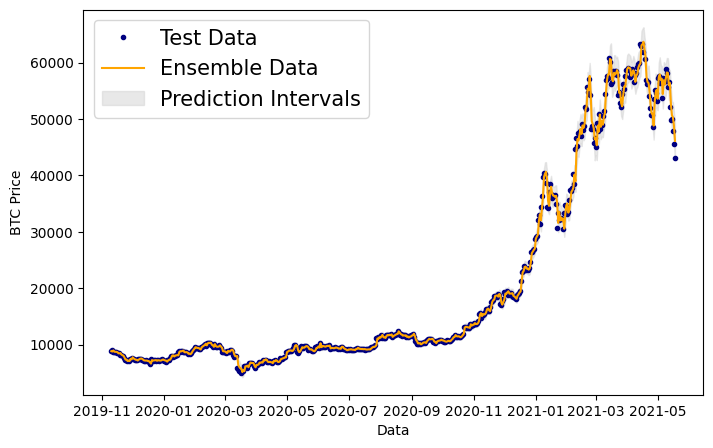

In [ ]:
offset = 0
plt.figure(figsize=(8, 5))

plt.plot(X_test.index[offset:], y_test[offset:], ".", label="Test Data", color="navy")  # Dark blue

plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label="Ensemble Data", color="orange")  # Orange

plt.fill_between(X_test.index[offset:], lower[offset:], upper[offset:],
                 color="lightgray", alpha=0.5, label="Prediction Intervals")

plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(loc="upper left", fontsize=15)
plt.show()

# Model 9: Make Prediction Into The Future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
lables_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, lables_dataset_all))

dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)

In [ ]:
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation ="relu"),
    layers.Dense(HORIZON, activation= "linear")
  ], name = "model_9_feature")

In [ ]:
model_9.compile(
    loss = "mae",
    optimizer = "Adam"
)

In [ ]:
model_9.fit(
    dataset_all,
    epochs = 100,
    verbose = 0,
    callbacks = []
)

## Make Functions For Make Prediction Futures

In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size):
  future_forecast = []

  last_window = values[-window_size:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on\n{last_window} -> Prediction on: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(y_all, model_9, INTO_FUTURE, WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicting on
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction on: 55925.25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicting on
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55925.25      ] -> Prediction on: 52167.6015625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicting on
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55925.25       52167.6015625 ] -> Prediction on: 49913.1796875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicting on
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55925.25       52167.6015625  49913.1796875 ] -> Prediction on: 49381.15625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicting on
[47885.62525472 45604.61575361 43144.47129086 55925.25
 52167.6015625  49913.1796875  49381.15625   ] -> Prediction on: 46534.8515625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicting

## Plot Future Forecast

In [ ]:
future_forecast

[55925.25,
 52167.6,
 49913.18,
 49381.156,
 46534.85,
 46596.812,
 47396.805,
 55645.92,
 51803.812,
 49650.418,
 48330.844,
 46149.027,
 47738.445,
 50417.184]

In [ ]:
def get_future_dates(start_date, into_future, offset = 1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep, type(last_timestep)

(Timestamp('2021-05-18 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [ ]:
next_time_step = get_future_dates(last_timestep, INTO_FUTURE, 1)
next_time_step

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_step = np.insert(next_time_step, 0,  last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

In [ ]:
next_time_step, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55925.25 , 52167.6  , 49913.18 , 49381.156, 46534.85 ,
        46596.812, 47396.805, 55645.92 , 51803.812, 49650.418, 48330.844,
        46149.027, 47738.445, 50417.184], dtype=float32))

## Plot Future Prediction

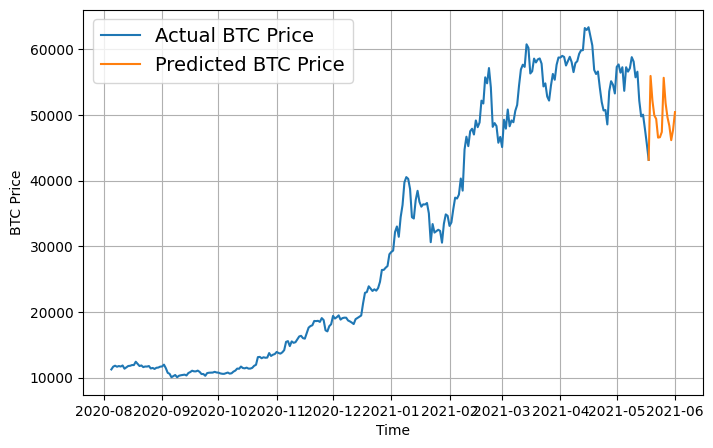

In [ ]:
plt.figure(figsize = (8,5))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format = '-', label = "Actual BTC Price")
plot_time_series(next_time_step, future_forecast, format = '-', label = "Predicted BTC Price")

# Model 10: The Turky Problem

In [ ]:
btc_price_turky = btc_price.copy()

btc_price_turky[-1] = btc_price_turky[-1] / 100

In [ ]:
btc_price_turky[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timestemps_turky = np.array(bitcoin_prices.index)
btc_timestemps_turky[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

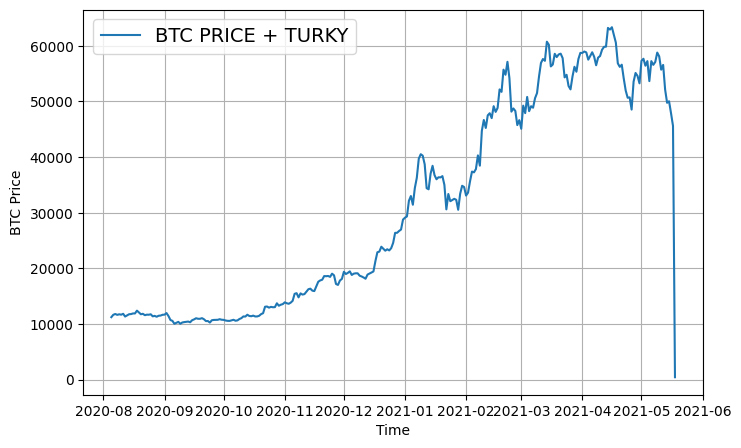

In [ ]:
plt.figure(figsize = (8, 5))
plot_time_series(timestamps=btc_timestemps_turky, values = btc_price_turky, format = "-", label = "BTC PRICE + TURKY", start = 2500)

## Create Train And Test Sets

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turky), window_size=WINDOW_SIZE, horizon =HORIZON)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Build Turky Model

In [254]:
model_10 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear"),
], name = "model_10_turky")

In [255]:
model_10.compile(
    loss = "mae",
    optimizer = "Adam"
)

In [256]:
model_10.fit(
    X_train,
    y_train,
    epochs = 100,
    validation_data = (X_test, y_test),
    verbose = 0,
    batch_size = 128,
    callbacks = [create_model_checkpoint(model_10.name)]
)

In [257]:
model_10.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 290.6037


645.1947021484375

In [259]:
model_10_preds = make_preds(model_10, X_test)
model_10_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.458, 8764.666, 9031.963, 8775.4  , 8705.532, 8722.459,
       8687.551, 8486.435, 8455.198, 8517.781], dtype=float32)>

In [260]:
model_10_results = evaluate_preds(y_test, model_10_preds)
model_10_results

{'mae': 645.19464,
 'mse': 4844218.0,
 'rmse': 2200.9585,
 'mape': 21.397041,
 'mase': 26.496265}